## **CIND 820 - Big Data Analytics Project**

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

**Create a data frame of the Room Occupancy dataset. Display the names of the columns. Check the data types of the attributes. Run a summary statistics of the dataset.**

In [2]:
# Read the CSV file into a data frame called Occupancy
Occupancy = pd.read_csv('Occupancy_Estimation.csv')

# Display the first five records of the data frame
Occupancy.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Get the column names
print("Column Names:", Occupancy.columns)

Column Names: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [4]:
# Get the data types of each column
print("\nData Types of Each Column:")
print(Occupancy.dtypes)


Data Types of Each Column:
Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [5]:
# Get the summary statistics
print("Summary Statistics:")
print(Occupancy.describe())

Summary Statistics:
            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744  

**Standardize the features**

To replicate the results of the Singh et al. study, exclude the light features. 

In [12]:
# Standardize the features
# Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(Occupancy[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
                                                          'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
                                                          'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']]))
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.463033,-1.357775,-1.162334,-1.049684,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,-0.314749,-0.294029
1,-1.463033,-1.357775,-1.162334,-0.881342,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,-0.314749,-0.294029
2,-1.292255,-1.357775,-1.302764,-0.881342,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,-0.314749,-0.294029
3,-1.292255,-1.357775,-1.162334,-0.881342,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,-0.314749,-0.294029
4,-1.292255,-1.357775,-1.162334,-0.881342,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,-0.314749,-0.294029


**Check the Co-relation between featrues without PCA**

<Axes: >

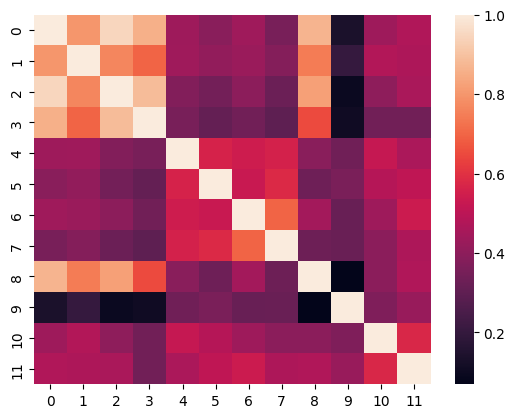

In [15]:
# Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

Based on the above heatmap, we can see that several pairs of features have moderate to highter correlation.

**Applying Principal Component Analysis**

To replicate the results of the Singh et al. study, choose 4 as the number of principal components we want in our final dataset.

In [13]:
#Applying PCA
#Taking no. of Principal Components as 4
pca = PCA(n_components = 4)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4'])
data_pca.head()

,PC1,PC2,PC3,PC4
0,-2.020087,1.513723,0.280631,-0.145457
1,-1.392209,1.945022,-0.118213,0.566139
2,-1.752798,1.575533,0.006986,0.209629
3,-1.671908,1.550748,-0.176899,0.171529
4,-2.016669,1.168379,0.038259,0.093576


**Checking Co-relation between features after PCA**

<Axes: >

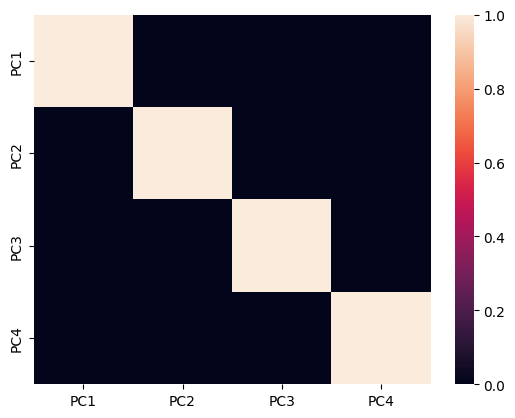

In [14]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

Based on the above heatmap, there is no correlation between the principal components (PC1, PC2, PC3, and PC4).

In [16]:
# Add the Room_Occupancy_Count to the reduced dataset
data_pca['Room_Occupancy_Count'] = Occupancy['Room_Occupancy_Count']
data_pca.head()

,PC1,PC2,PC3,PC4,Room_Occupancy_Count
0,-2.020087,1.513723,0.280631,-0.145457,1
1,-1.392209,1.945022,-0.118213,0.566139,1
2,-1.752798,1.575533,0.006986,0.209629,1
3,-1.671908,1.550748,-0.176899,0.171529,1
4,-2.016669,1.168379,0.038259,0.093576,1


In [17]:
# Export CSV to working directory
data_pca.to_csv('pca.csv')